In [ ]:
#!pip install pytorch_transformers
#!pip install seaborn

In [1]:
import torch
from transformers import BertConfig, BertTokenizer, BertModel

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model_type = 'bert-base-uncased'
config = BertConfig.from_pretrained(model_type)
config.output_attentions = True
model = BertModel.from_pretrained(model_type,config = config)#.to('cuda')
tokenizer = BertTokenizer.from_pretrained(model_type)

In [3]:
text1 = 'We met today and she wanted to'
text2 = 'meet again'
tok1 = tokenizer.tokenize(text1)
tok2 = tokenizer.tokenize(text2)

In [4]:
#Extract desired token position
p_pos = len(tok1) # position for token
tok = tok1+tok2
tok,p_pos, tok[p_pos]

(['we', 'met', 'today', 'and', 'she', 'wanted', 'to', 'meet', 'again'],
 7,
 'meet')

In [5]:
ids = torch.tensor(tokenizer.convert_tokens_to_ids(tok)).unsqueeze(0).to('cuda')
with torch.no_grad():
    output = model(ids)
attentions = torch.cat(output[2]).to('cpu')
# attentions.shape #(layer, batch_size (squeezed by torch.cat), num_heads, sequence_length, sequence_length)

torch.Size([12, 12, 9, 9])

In [6]:
attentions = attentions.permute(2,1,0,3)
# print(attentions.shape) #(sequence_length, num_heads, layer, sequence_length)
# torch.Size([9, 12, 12, 9])
layers = len(attentions[0][0])
heads = len(attentions[0])
seqlen = len(attentions)
# layers,heads,seqlen
# (12, 12, 9)

Attention weights for token meet


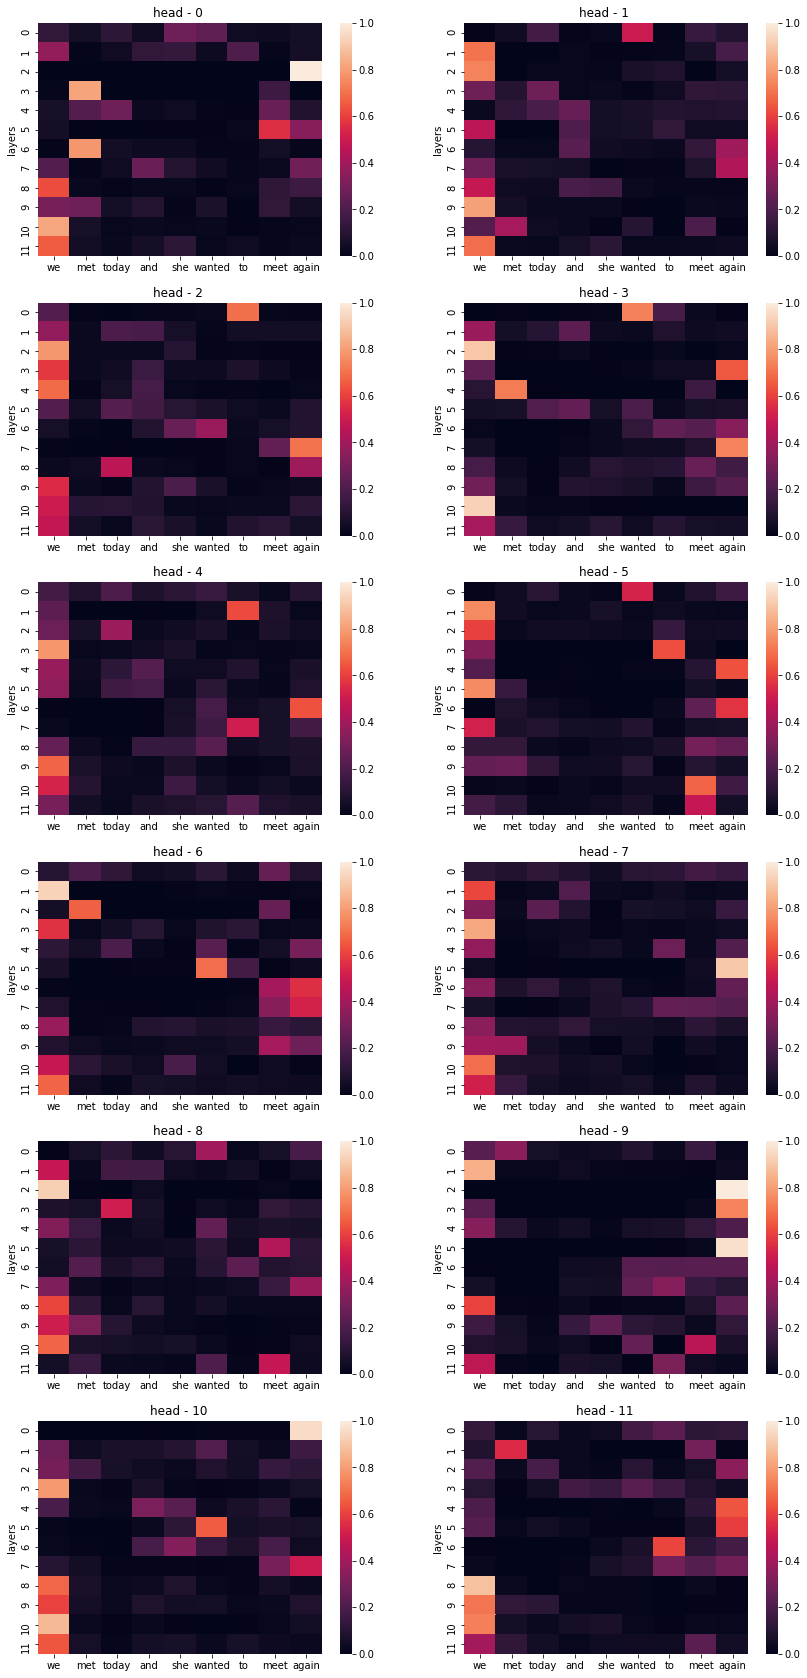

In [7]:
# Extract attentions for token
attentions_pos = attentions[p_pos]

#Plot Attention

cols = 2
rows = int(heads/cols)

fig, axes = plt.subplots( rows,cols, figsize = (14,30))
axes = axes.flat
print (f'Attention weights for token {tok[p_pos]}')
for i,att in enumerate(attentions_pos):

    #im = axes[i].imshow(att, cmap='gray')
    sns.heatmap(att,vmin = 0, vmax = 1,ax = axes[i], xticklabels = tok)
    axes[i].set_title(f'head - {i} ' )
    axes[i].set_ylabel('layers')


<AxesSubplot:>

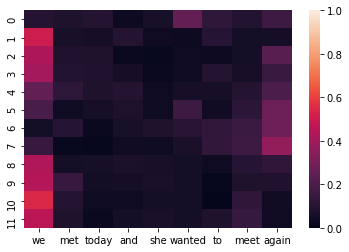

In [8]:
# Attention weights for token meet
# attentions

# See average attention for token
avg_attention = attentions_pos.mean(dim = 0)
sns.heatmap(avg_attention,vmin = 0, vmax = 1, xticklabels= tok, )
# mean attentions